<a href="https://colab.research.google.com/github/shrutin11/Deep-Learning-and-Computer-Vision-Lab/blob/main/8_harris_corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Chess_Board.png to Chess_Board (1).png
SobelX:



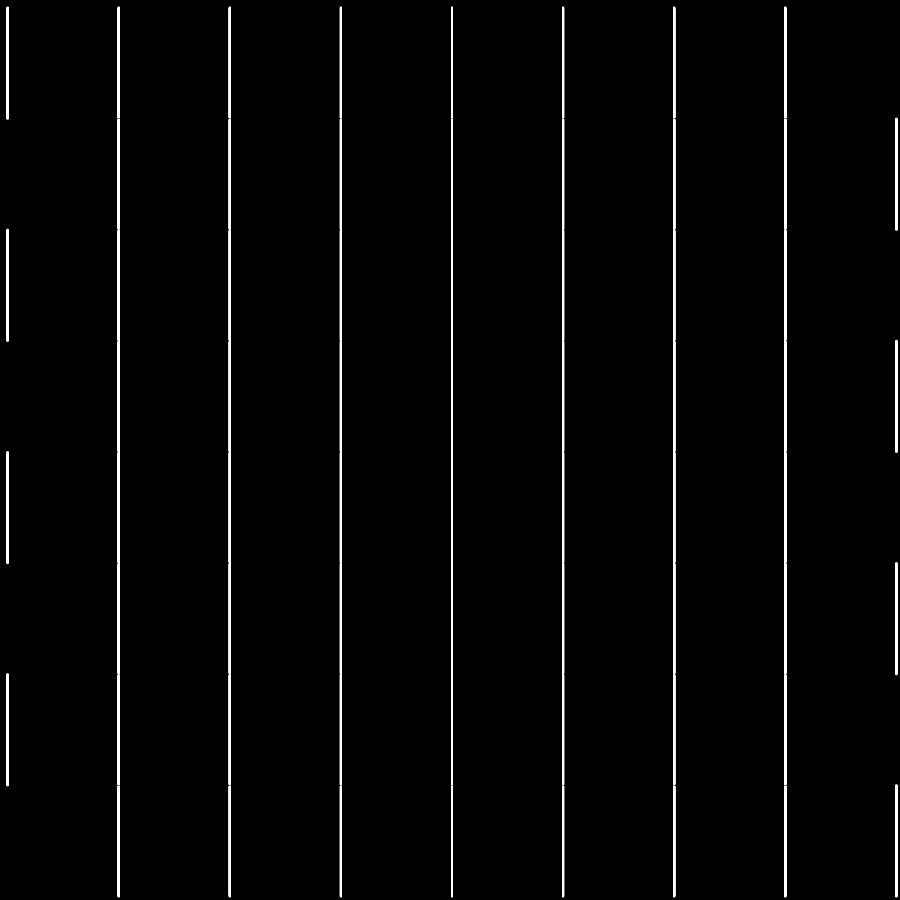

SobelY:



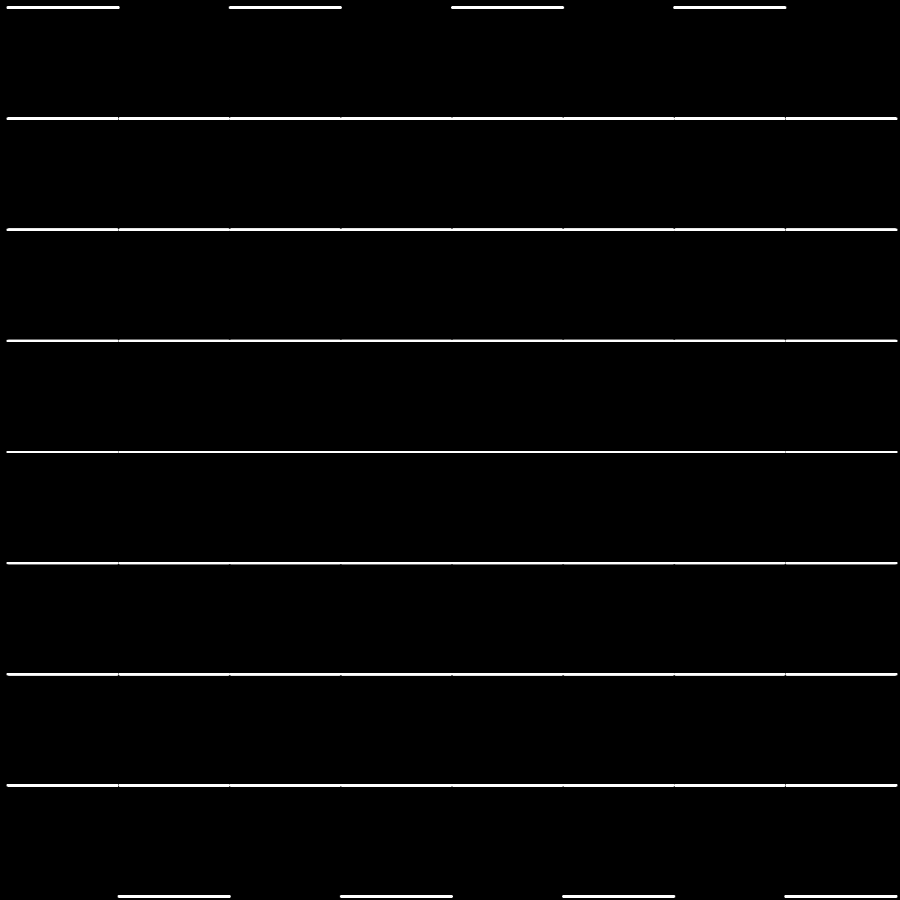

(900, 900) (900, 900)
Corners:



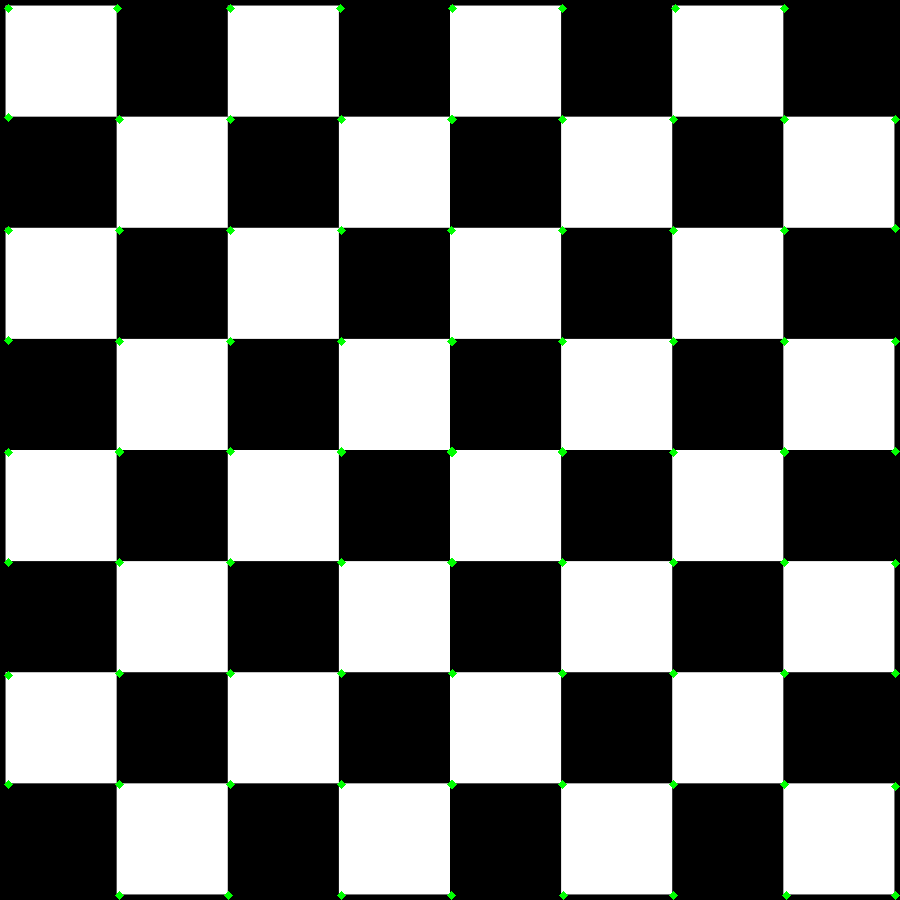

True

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Kernel operation using input operator of size 3*3
def GetSobel(image, Sobel, width, height):
    # Initialize the matrix
    I_d = np.zeros((width, height), np.float32)

    # For every pixel in the image
    for rows in range(width):
        for cols in range(height):
            # Run the Sobel kernel for each pixel
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d

# Method implements the Harris Corner Detection algorithm
def HarrisCornerDetection(image):

    # The two Sobel operators - for x and y direction
    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    w, h = image.shape

    # X and Y derivative of image using Sobel operator
    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    # Eliminate the negative values
    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1

    # Display the output results after Sobel operations
    print("SobelX:\n")
    cv2_imshow(ImgX)
    print("SobelY:\n")
    cv2_imshow(ImgY)

    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)

    # Use Gaussian Blur
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)
    print(ImgXY.shape, ImgYX.shape)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    # For every pixel find the corner strength
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R

#### Main Program ####

# Read the uploaded image
testimage = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
w, h = testimage.shape

# Convert image to color to draw colored circles on it
bgr = cv2.cvtColor(testimage, cv2.COLOR_GRAY2RGB)

# Corner detection
R = HarrisCornerDetection(testimage)

# Empirical Parameter
CornerStrengthThreshold = 600000

# Plot detected corners on image
radius = 2
color = (0, 255, 0)  # Green
thickness = 4

PointList = []
# Look for Corner strengths above the threshold
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            max = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max:
                            skip = True
                            break

            if not skip:
                # Point is expressed in x, y which is col, row
                cv2.circle(bgr, (col, row), radius, color, thickness)
                PointList.append((row, col))

# Display image indicating corners and save it
print("Corners:\n")
cv2_imshow(bgr)
outname = "Output_" + str(CornerStrengthThreshold) + ".png"
cv2.imwrite(outname, bgr)
